### Overview

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if 'module_path' not in sys.path:
    sys.path.append(module_path)

from IPython.display import display
import numpy as np
import nibabel as nib
from nilearn import plotting
import neurolang as nl
from typing import AbstractSet, Callable
from neurolang.CD_relations import *
from neurolang.frontend import *
from neurolang.regions import *
from neurolang.region_solver import *
from neurolang.symbols_and_types import TypedSymbolTable, is_subtype, Constant, Predicate, Query, Symbol

%matplotlib inline

In [22]:
subject = '100206'
t1w_path = f'../data/{subject}/T1w/T1w_acpc_dc_restore_brain.nii.gz'
labels_path = f'../data/{subject}/T1w/aparc.a2009s+aseg.nii.gz'
labeled_im = nib.load(labels_path)
t1w_im = nib.load(t1w_path)
neurolang = RegionFrontend()

In [23]:
#regions_2 = neurolang.load_parcellation(labeled_im, selected_labels='CTX_LH_S*')
#regions_2

In [24]:
neurolang.load_parcellation(labeled_im, selected_labels=('CTX_RH_G_AND_S_SUBCENTRAL'))
subcentral_g_and_s = neurolang.get_symbol('CTX_RH_G_AND_S_SUBCENTRAL')
type(subcentral_g_and_s)

neurolang.frontend.query_resolution.QueryBuilderSymbol

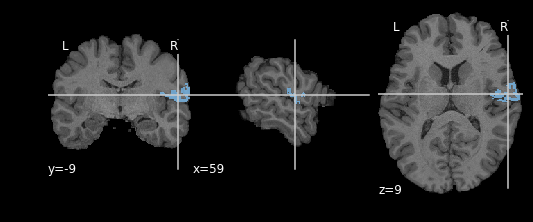

In [25]:
img = region_union(subcentral_g_and_s.value).spatial_image()
plotting.plot_roi(img, t1w_im, cmap=plotting.cm.cyan_copper) 

In [26]:
emotion = neurolang.neurosynth_term_to_region_set('emotion')
f'regions defined using the term emotion is: {len(emotion.value)}'

'regions defined using the term emotion is: 149'

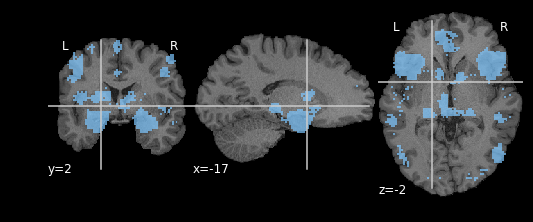

In [27]:
plotting.plot_roi(region_union(emotion.value).spatial_image(), t1w_im, cmap=plotting.cm.cyan_copper)

In [28]:
result_sup = neurolang.solve_query(
    neurolang.define_predicate('superior_of',  subcentral_g_and_s),
    result_symbol_name='superior_rh_subcentral'
)
f'from the {len(emotion.value)} regions related to the term emotion \
only {len(result_sup.value)} are superior to {subcentral_g_and_s.symbol_name}'

'from the 149 regions related to the term emotion only 71 are superior to CTX_RH_G_AND_S_SUBCENTRAL'

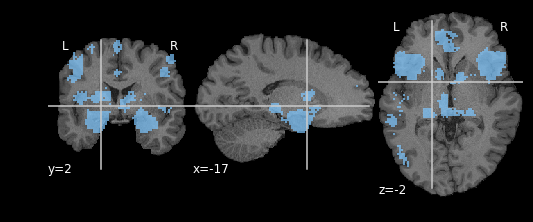

In [31]:
result_sup_region = region_union(result_sup.value)
plotting.plot_roi(result_sup_region.spatial_image(), t1w_im, cmap=plotting.cm.cyan_copper)